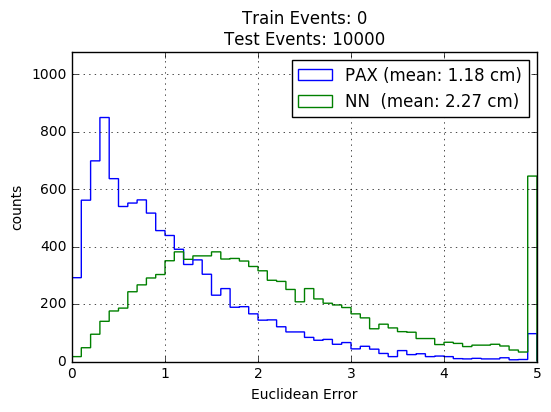

In [11]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

import matplotlib.pyplot as plt
import numpy as np


#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

#f = 'sbatch_nn/10k/nn_pred.npy'
#f = 'sbatch_nn/50k/nn_pred.npy'
f = 'sbatch_nn/60k/nn_pred.npy'

arr    = np.load(f)

xmean = np.mean(arr)
xmin  = np.amin(arr)
xmax  = np.amax(arr)
nz    = np.count_nonzero(arr)

#print(arr.shape)
#print(arr[0:3,:])
#print(nz)
#print("xmin: {0}".format(xmin))
#print("xmax: {0}".format(xmax))


#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

x_true  = arr[:,0]
y_true  = arr[:,1]
x_s2    = arr[:,2]
y_s2    = arr[:,3]
x_pred  = arr[:,4]
y_pred  = arr[:,5]
dx_s2   = x_true - x_s2
dy_s2   = y_true - y_s2
dx_pred = x_true - x_pred
dy_pred = y_true - y_pred

dr2_s2        = np.sqrt(dx_s2**2   + dy_s2**2) 
dr2_pred      = np.sqrt(dx_pred**2 + dy_pred**2) 
dr2_s2_mean   = np.mean(dr2_s2)
dr2_pred_mean = np.mean(dr2_pred)


#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

xmax=5

lbl_s2   = "PAX (mean: {0:.2f} cm)".format(dr2_s2_mean)
lbl_pred = "NN  (mean: {0:.2f} cm)".format(dr2_pred_mean)

plt.hist(np.clip(dr2_s2  , 0, xmax), bins=50, range=[0, xmax], histtype='step', label=lbl_s2)
plt.hist(np.clip(dr2_pred, 0, xmax), bins=50, range=[0, xmax], histtype='step', label=lbl_pred)
#plt.hist(np.clip(dr2_s2, 0, xmax), bins=50, histtype='step', label=lbl_pred)

plt.xlabel("Euclidean Error")
plt.ylabel("counts")
plt.title("Train Events: {0}\nTest Events: {1}".format(0, arr.shape[0]))
plt.ylim([0, plt.gca().get_ylim()[1]*1.2])
plt.legend()
plt.grid()
